In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

In [32]:
# CIFAR-100 veri setini yükle
(x_train_all, y_train_all), (_, _) = cifar100.load_data(label_mode='fine')

# İstenilen sınıfların numaraları
selected_classes = [10, 29, 52, 63, 65, 69, 80]


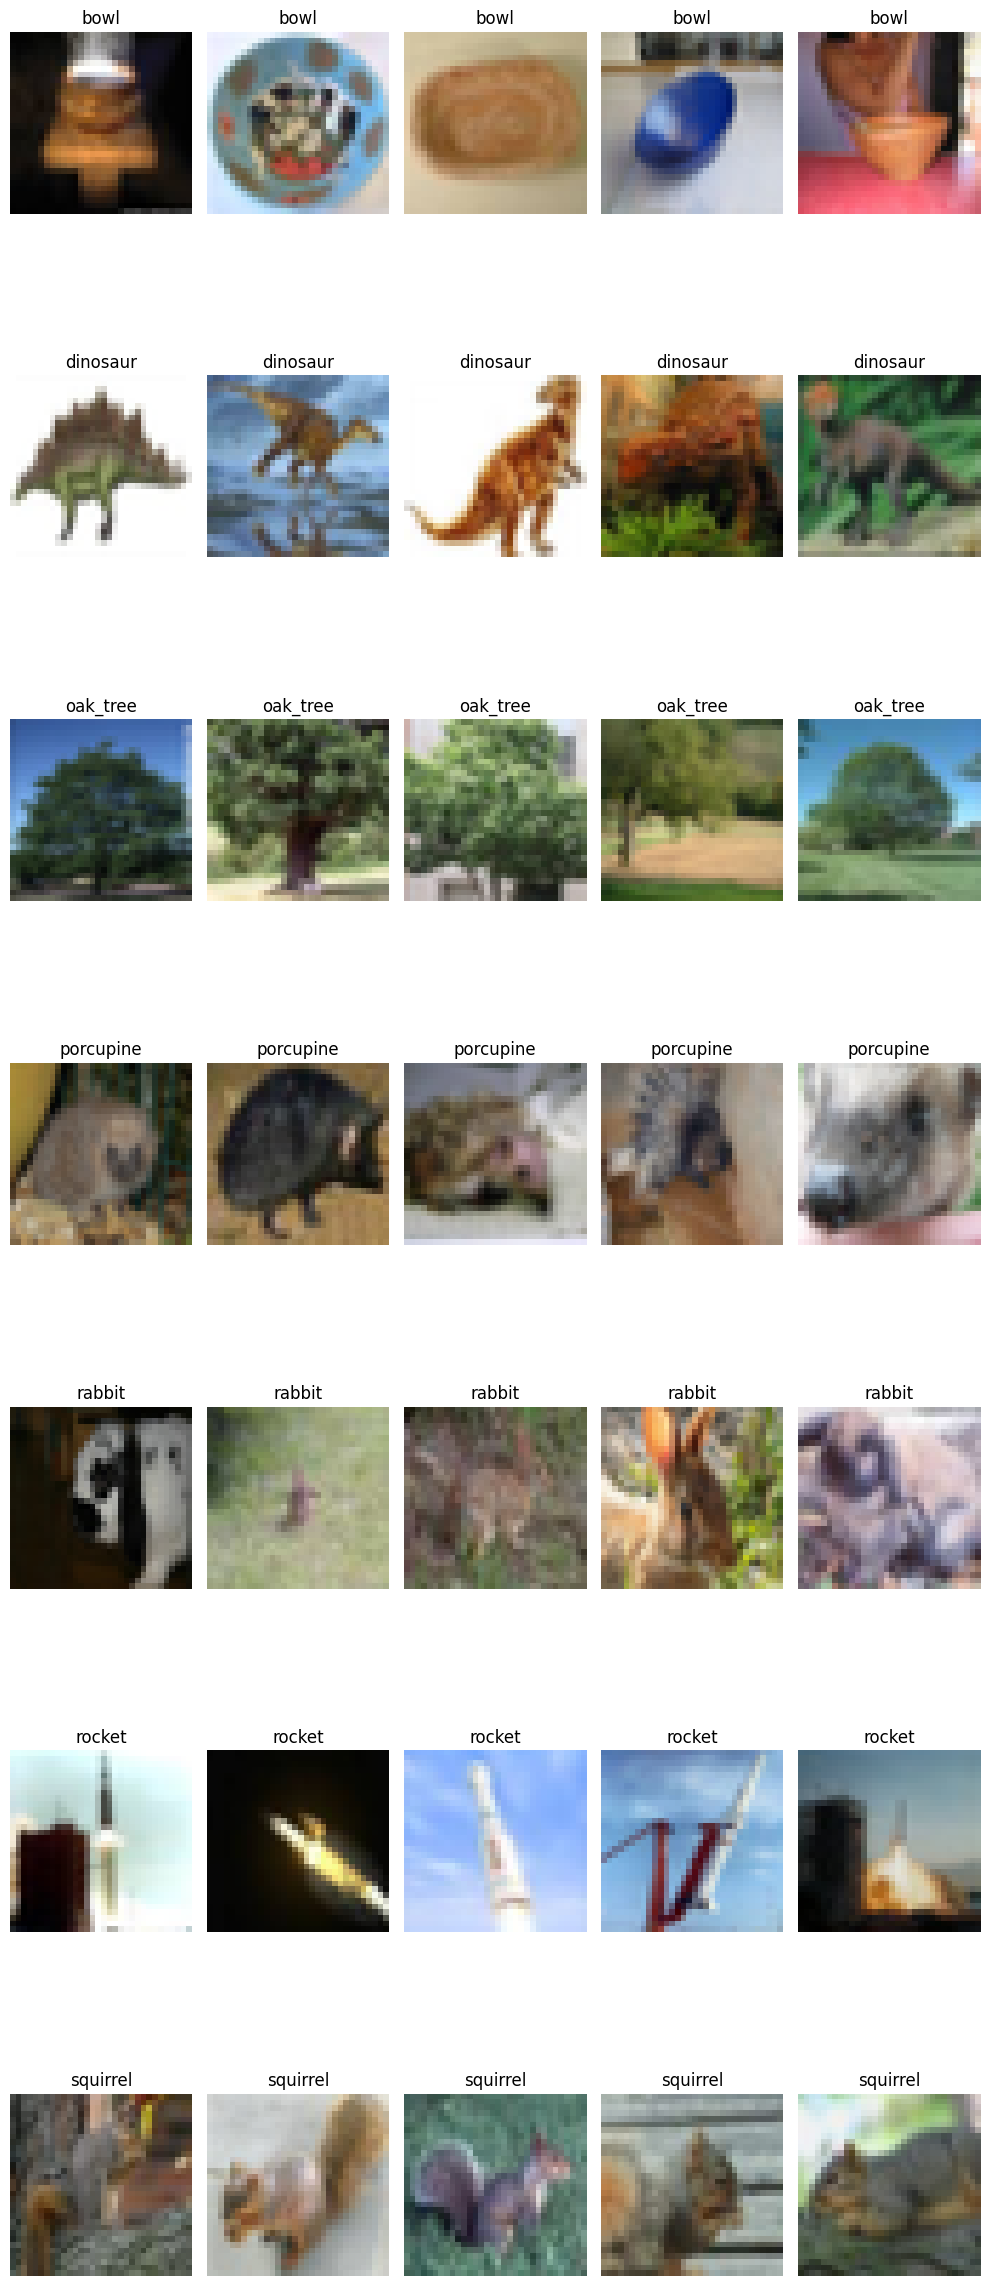

In [34]:
def show_sample_images(classes, num_samples=5):
    # CIFAR-100 veri setini yükle
    (x_train, y_train), (_, _) = cifar100.load_data(label_mode='fine')

    plt.figure(figsize=(10, 5*num_samples))
    

    for i, class_id in enumerate(classes):
        # Sınıfın örnek görüntülerini al
        class_indices = np.where(y_train.flatten() == class_id)[0]
        samples = x_train[class_indices[:num_samples]]
        classes_name=["bowl","dinosaur","oak_tree","porcupine","rabbit","rocket","squirrel"]
        # Örnek görüntüleri göster
        for j in range(num_samples):
            plt.subplot(len(classes), num_samples, i*num_samples + j + 1)
            plt.imshow(samples[j])
            plt.title(f"{classes_name[i]}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()


# Örnek görüntüleri göster
show_sample_images(selected_classes)

In [35]:
# Seçilen sınıflara ait verileri ayır
x_train_selected = []
y_train_selected = []
for i, label in enumerate(y_train_all):
    if label in selected_classes:
        x_train_selected.append(x_train_all[i])
        y_train_selected.append(selected_classes.index(label))

In [36]:
# Veriyi numpy dizisine dönüştür
x_train_selected = np.array(x_train_selected)
y_train_selected = np.array(y_train_selected)

# Veriyi normalize et
x_train_selected = x_train_selected / 255.0

# Veriyi eğitim ve doğrulama setlerine ayır
x_train, x_val, y_train, y_val = train_test_split(x_train_selected, y_train_selected, test_size=0.2, random_state=42)

In [37]:

# Veri artırımı (Data Augmentation) işlemi
datagen = ImageDataGenerator(
    rotation_range=2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest',
    zoom_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    channel_shift_range=0.2,
    rescale=None
)
datagen.fit(x_train)

In [38]:
# # Modeli oluştur
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax') ])
    
    
    return model

In [39]:

# Modeli derleme
model=create_model(x_train.shape[1:], len(selected_classes))
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Erken durdurma ve model kontrolü
callbacks = [EarlyStopping(patience=3, restore_best_weights=True)]

# Modeli eğit
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val),callbacks=callbacks,verbose=1)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.1598 - loss: 1.9306 - val_accuracy: 0.3443 - val_loss: 1.5737
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3584 - loss: 1.5815 - val_accuracy: 0.4114 - val_loss: 1.4255
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4338 - loss: 1.4381 - val_accuracy: 0.4571 - val_loss: 1.3616
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4640 - loss: 1.3511 - val_accuracy: 0.5243 - val_loss: 1.2801
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5139 - loss: 1.2208 - val_accuracy: 0.5500 - val_loss: 1.1697
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5692 - loss: 1.1608 - val_accuracy: 0.5729 - val_loss: 1.1509
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5837 - loss: 1.0914 - val_accuracy: 0.5986 - val_loss: 1.0720
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6387 - loss: 0.9830 - val_accuracy: 0.6171 - v

In [40]:
model.summary()

Model: "sequential_813"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2439 (Conv2D)            │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2439              │ (None, 15, 15, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2440 (Conv2D)            │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2440              │ (None, 6, 6, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2441 (Conv2D)            │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2441              │ (None, 2, 2, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_813 (Flatten)           │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2439 (Dense)              │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_813 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2440 (Dense)              │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2441 (Dense)              │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 892,823 (3.41 MB)

 Trainable params: 297,607 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 595,216 (2.27 MB)

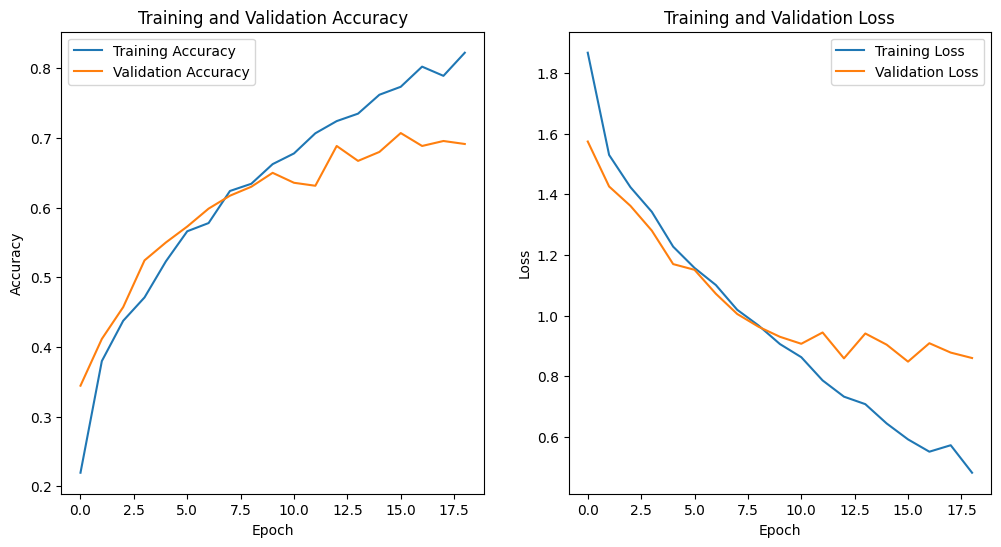

In [41]:

# Eğitim geçmişini çiz
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



In [42]:
# Test veri setini yükle
(x_test_all, y_test_all), (_, _) = cifar100.load_data(label_mode='fine')

# Seçilen sınıflara ait test verilerini ayır
x_test_selected = []
y_test_selected = []
for i, label in enumerate(y_test_all):
    if label in selected_classes:
        x_test_selected.append(x_test_all[i])
        y_test_selected.append(selected_classes.index(label))


In [43]:

# Veriyi numpy dizisine dönüştür
x_test_selected = np.array(x_test_selected)
y_test_selected = np.array(y_test_selected)

# Veriyi normalize et
x_test_selected = x_test_selected / 255.0

# Modelin tahminlerini al
y_pred = model.predict(x_test_selected).argmax(axis=1)

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


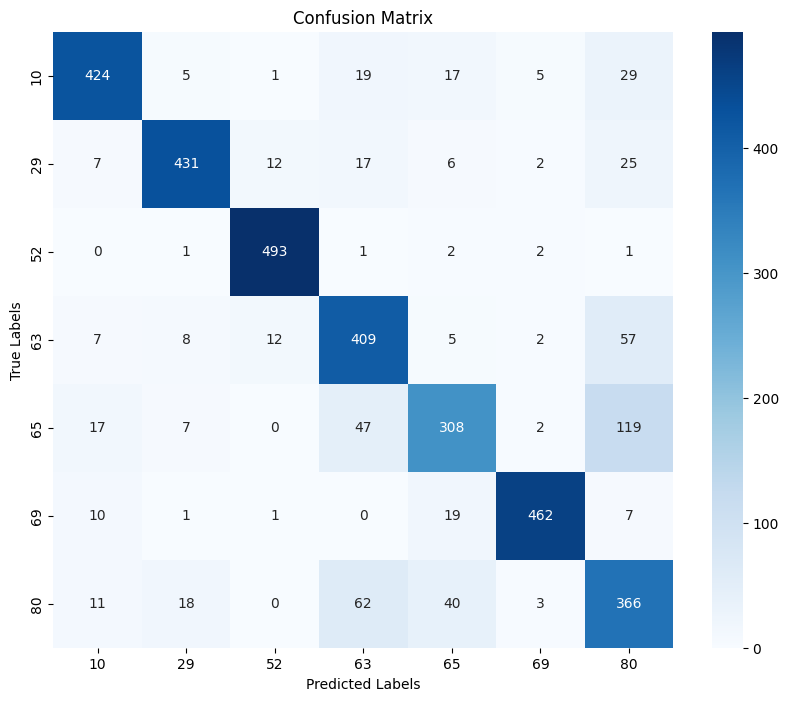

In [44]:
# Karmaşıklık matrisini hesapla
cm = confusion_matrix(y_test_selected, y_pred)

# Karmaşıklık matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=selected_classes, yticklabels=selected_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


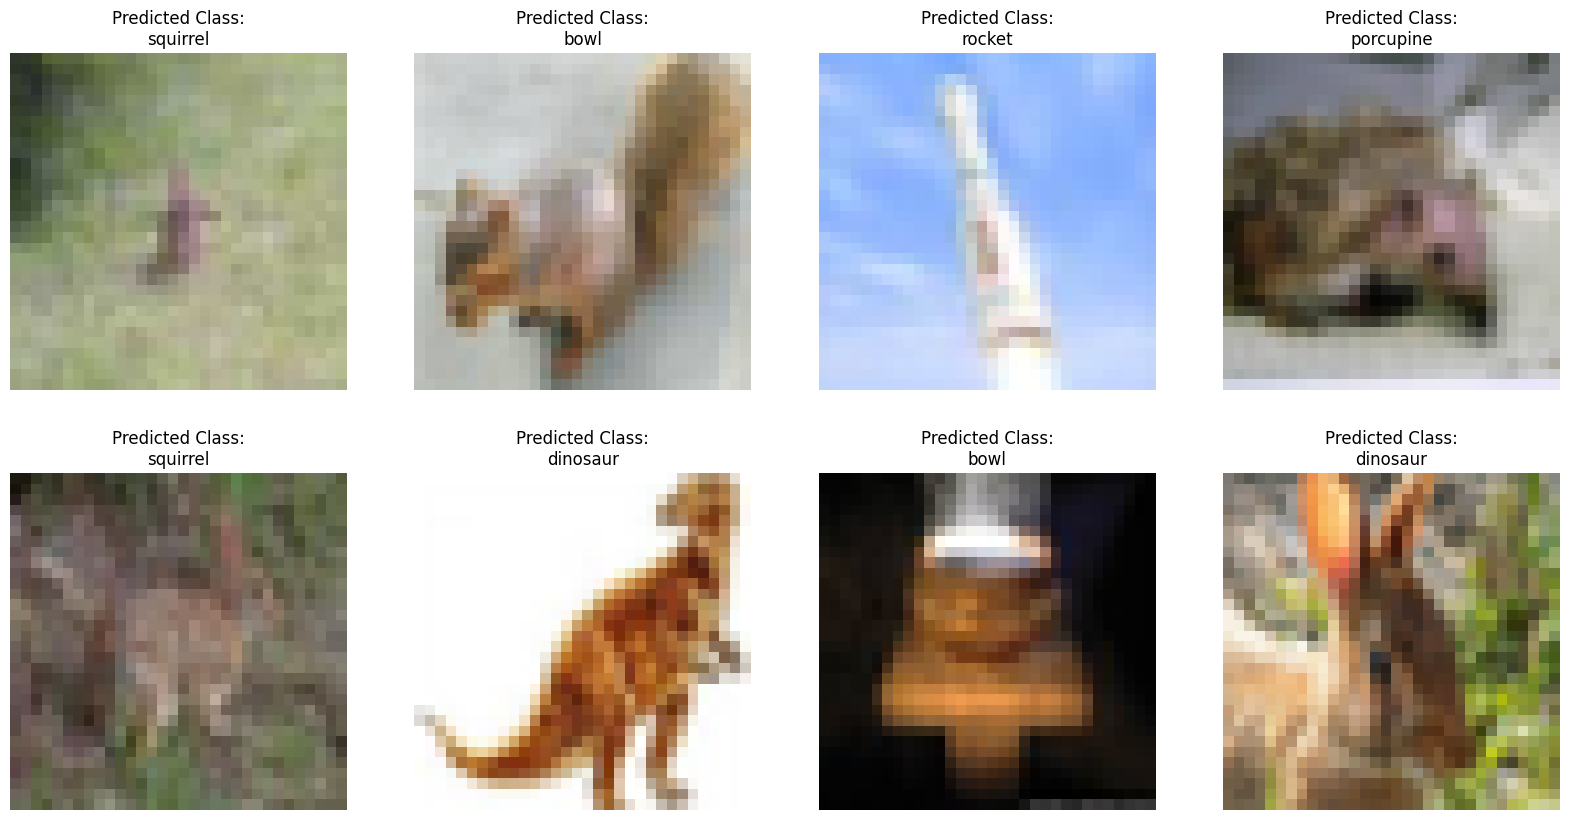

In [ ]:
# Sınıf numaralarını isimlere dönüştür
class_names = {
    10: 'bowl',
    29: 'dinosaur',
    52: 'oak_tree',
    63: 'porcupine',
    65: 'rabbit',
    69: 'rocket',
    80: 'squirrel'
}
# predict every class

# Seçilen test görüntülerini al
selected_test_images = x_test_selected[10:18]
predictions = model.predict(selected_test_images)

# Tahmin edilen sınıfların isimlerini bul
predicted_classes = [class_names[selected_classes[np.argmax(prediction)]] for prediction in predictions]

plt.figure(figsize=(20, 10))
for i in range(len(selected_test_images)):
    plt.subplot(2,4 , i+1)
    plt.imshow(selected_test_images[i])
    plt.title(f'Predicted Class:\n{predicted_classes[i]}')
    plt.axis('off')

plt.show()